# Paper

Data used is stock price from 2020 - July 2024. 

In [222]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
sc = MinMaxScaler(feature_range=(0,1)) #normalisasi dari 0 - 
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

## Long Term
Data used is:
- Train : 2020 - 2022 (3 year)
- Test : 2023 - July 2024 (1 year 7 month )

In [223]:
model_long = pd.read_csv("../result_paper_tuning/result_long_tuning.csv")
model_long.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
0,ASII,long,LSTM,183.016672,0.072196,50,50,rmsprop,32
1,ASII,long,GRU,172.779083,0.068157,50,50,rmsprop,32
2,ASII,long,RNN,114.783293,0.045279,50,50,rmsprop,32
3,AMRT,long,LSTM,85.819877,0.161924,50,50,rmsprop,32
4,AMRT,long,GRU,378.519532,0.424805,50,50,rmsprop,32


### ASII

In [224]:
data_ASII_long = model_long[model_long["stock"] == "ASII"]
data_ASII_long.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
0,ASII,long,LSTM,183.016672,0.072196,50,50,rmsprop,32
1,ASII,long,GRU,172.779083,0.068157,50,50,rmsprop,32
2,ASII,long,RNN,114.783293,0.045279,50,50,rmsprop,32
18,ASII,long,LSTM,174.668844,0.068903,50,50,adam,32
19,ASII,long,GRU,90.945713,0.035876,50,50,adam,32


#### LSTM

In [225]:
data_ASII_LSTM_long = data_ASII_long[data_ASII_long["algorithm"] == "LSTM"]
minimum_LSTM_ASII = data_ASII_LSTM_long["rmse_norm"].min()
minimum_config_LSTM_ASII = data_ASII_LSTM_long[data_ASII_LSTM_long["rmse_norm"] == minimum_LSTM_ASII]
minimum_config_LSTM_ASII

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
126,ASII,long,LSTM,125.415737,0.049474,50,100,adam,32


#### GRU

In [226]:
data_ASII_GRU_long = data_ASII_long[data_ASII_long["algorithm"] == "GRU"]
minimum_GRU_ASII = data_ASII_GRU_long["rmse_norm"].min()
minimum_config_GRU_ASII = data_ASII_GRU_long[data_ASII_GRU_long["rmse_norm"] == minimum_GRU_ASII]
minimum_config_GRU_ASII

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
19,ASII,long,GRU,90.945713,0.035876,50,50,adam,32


#### RNN

In [227]:
data_ASII_RNN_long = data_ASII_long[data_ASII_long["algorithm"] == "RNN"]
minimum_RNN_ASII = data_ASII_RNN_long["rmse_norm"].min()
minimum_config_RNN_ASII = data_ASII_RNN_long[data_ASII_RNN_long["rmse_norm"] == minimum_RNN_ASII]
minimum_config_RNN_ASII

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
2,ASII,long,RNN,114.783293,0.045279,50,50,rmsprop,32


#### Best Model

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
2,ASII,long,RNN,114.783293,0.045279,50,50,rmsprop,32
19,ASII,long,GRU,90.945713,0.035876,50,50,adam,32
126,ASII,long,LSTM,125.415737,0.049474,50,100,adam,32


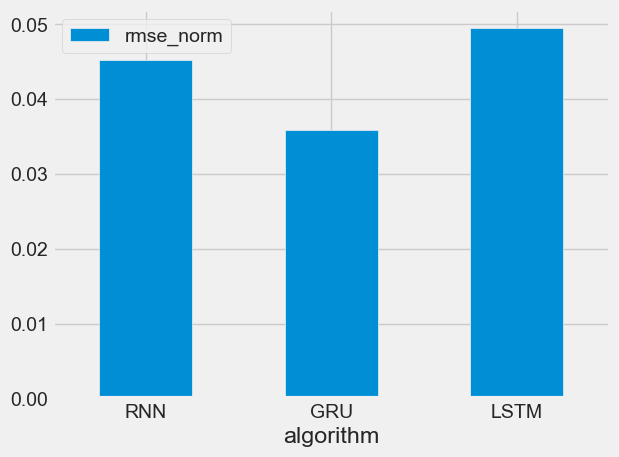

In [228]:
data_tuning_long_ASII = pd.concat([minimum_config_RNN_ASII, minimum_config_GRU_ASII, minimum_config_LSTM_ASII])
bar_ASII_tuning_short = data_tuning_long_ASII.plot.bar(x='algorithm', y=['rmse_norm'], rot=0)
data_tuning_long_ASII

### AMRT

In [229]:
data_AMRT_long = model_long[model_long["stock"] == "AMRT"]
data_AMRT_long.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
3,AMRT,long,LSTM,85.819877,0.161924,50,50,rmsprop,32
4,AMRT,long,GRU,378.519532,0.424805,50,50,rmsprop,32
5,AMRT,long,RNN,61.072109,0.115230,50,50,rmsprop,32
21,AMRT,long,LSTM,89.416180,0.168710,50,50,adam,32
22,AMRT,long,GRU,85.725099,0.161745,50,50,adam,32


#### LSTM

In [230]:
data_AMRT_LSTM_long = data_AMRT_long[data_AMRT_long["algorithm"] == "LSTM"]
minimum_LSTM_AMRT = data_AMRT_LSTM_long["rmse_norm"].min()
minimum_config_LSTM_AMRT = data_AMRT_LSTM_long[data_AMRT_LSTM_long["rmse_norm"] == minimum_LSTM_AMRT]
minimum_config_LSTM_AMRT

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
129,AMRT,long,LSTM,74.762638,0.141062,50,100,adam,32


#### GRU

In [231]:
data_AMRT_GRU_long = data_AMRT_long[data_AMRT_long["algorithm"] == "GRU"]
minimum_GRU_AMRT = data_AMRT_GRU_long["rmse_norm"].min()
minimum_config_GRU_AMRT = data_AMRT_GRU_long[data_AMRT_GRU_long["rmse_norm"] == minimum_GRU_AMRT]
minimum_config_GRU_AMRT

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
130,AMRT,long,GRU,71.662189,0.135212,50,100,adam,32


#### RNN

In [232]:
data_AMRT_RNN_long = data_AMRT_long[data_AMRT_long["algorithm"] == "RNN"]
minimum_RNN_AMRT = data_AMRT_RNN_long["rmse_norm"].min()
minimum_config_RNN_AMRT = data_AMRT_RNN_long[data_AMRT_RNN_long["rmse_norm"] == minimum_RNN_AMRT]
minimum_config_RNN_AMRT

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
5,AMRT,long,RNN,61.072109,0.11523,50,50,rmsprop,32


#### Best Model

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
5,AMRT,long,RNN,61.072109,0.115230,50,50,rmsprop,32
130,AMRT,long,GRU,71.662189,0.135212,50,100,adam,32
129,AMRT,long,LSTM,74.762638,0.141062,50,100,adam,32


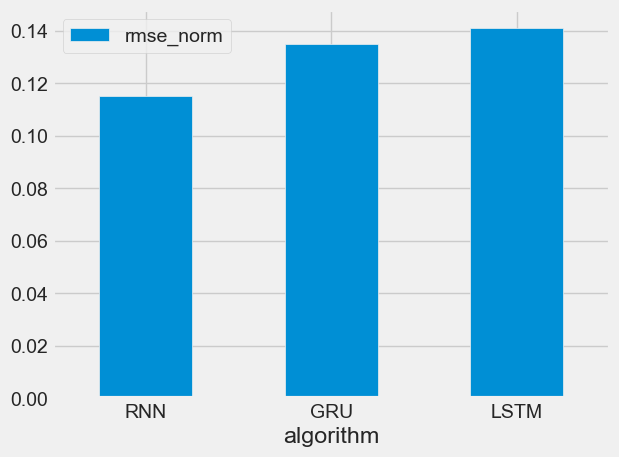

In [233]:
data_tuning_long_AMRT = pd.concat([minimum_config_RNN_AMRT, minimum_config_GRU_AMRT, minimum_config_LSTM_AMRT])
bar_AMRT_tuning_long = data_tuning_long_AMRT.plot.bar(x='algorithm', y=['rmse_norm'], rot=0)
data_tuning_long_AMRT

### ADRO

In [234]:
data_ADRO_long = model_long[model_long["stock"] == "ADRO"]
data_ADRO_long.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
6,ADRO,long,LSTM,142.066104,0.089915,50,50,rmsprop,32
7,ADRO,long,GRU,186.157352,0.117821,50,50,rmsprop,32
8,ADRO,long,RNN,161.447083,0.097582,50,50,rmsprop,32
24,ADRO,long,LSTM,128.380001,0.081253,50,50,adam,32
25,ADRO,long,GRU,128.533285,0.081350,50,50,adam,32


#### LSTM

In [235]:
data_ADRO_LSTM_long = data_ADRO_long[data_ADRO_long["algorithm"] == "LSTM"]
minimum_LSTM_ADRO = data_ADRO_LSTM_long["rmse_norm"].min()
minimum_config_LSTM_ADRO = data_ADRO_LSTM_long[data_ADRO_LSTM_long["rmse_norm"] == minimum_LSTM_ADRO]
minimum_config_LSTM_ADRO

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
24,ADRO,long,LSTM,128.380001,0.081253,50,50,adam,32


#### GRU

In [236]:
data_ADRO_GRU_long = data_ADRO_long[data_ADRO_long["algorithm"] == "GRU"]
minimum_GRU_ADRO = data_ADRO_GRU_long["rmse_norm"].min()
minimum_config_GRU_ADRO = data_ADRO_GRU_long[data_ADRO_GRU_long["rmse_norm"] == minimum_GRU_ADRO]
minimum_config_GRU_ADRO

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
133,ADRO,long,GRU,115.869519,0.073335,50,100,adam,32


#### RNN

In [237]:
data_ADRO_RNN_long = data_ADRO_long[data_ADRO_long["algorithm"] == "RNN"]
minimum_RNN_ADRO = data_ADRO_RNN_long["rmse_norm"].min()
minimum_config_RNN_ADRO = data_ADRO_RNN_long[data_ADRO_RNN_long["rmse_norm"] == minimum_RNN_ADRO]
minimum_config_RNN_ADRO

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
62,ADRO,long,RNN,94.993419,0.057883,50,50,rmsprop,64


#### Best Model

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
62,ADRO,long,RNN,94.993419,0.057883,50,50,rmsprop,64
133,ADRO,long,GRU,115.869519,0.073335,50,100,adam,32
24,ADRO,long,LSTM,128.380001,0.081253,50,50,adam,32


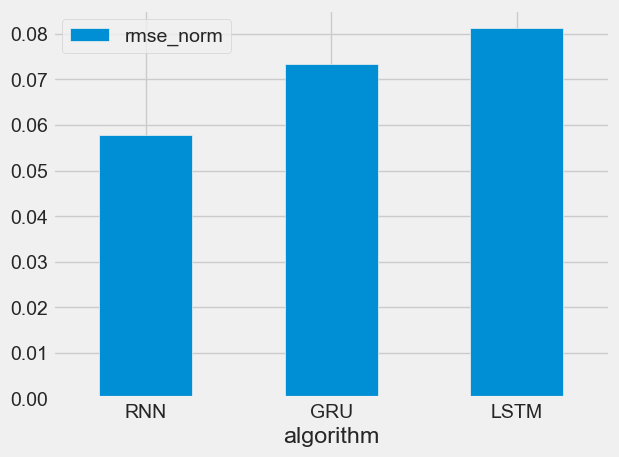

In [238]:
data_tuning_long_ADRO = pd.concat([minimum_config_RNN_ADRO, minimum_config_GRU_ADRO, minimum_config_LSTM_ADRO])
bar_ADRO_tuning_long = data_tuning_long_ADRO.plot.bar(x='algorithm', y=['rmse_norm'], rot=0)
data_tuning_long_ADRO

### MAPI

In [239]:
data_MAPI_long = model_long[model_long["stock"] == "MAPI"]
data_MAPI_long.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
9,MAPI,long,LSTM,91.273075,0.113383,50,50,rmsprop,32
10,MAPI,long,GRU,128.009271,0.147683,50,50,rmsprop,32
11,MAPI,long,RNN,94.488944,0.105479,50,50,rmsprop,32
27,MAPI,long,LSTM,90.775873,0.112765,50,50,adam,32
28,MAPI,long,GRU,100.168446,0.118075,50,50,adam,32


#### LSTM

In [240]:
data_MAPI_LSTM_long = data_MAPI_long[data_MAPI_long["algorithm"] == "LSTM"]
minimum_LSTM_MAPI = data_MAPI_LSTM_long["rmse_norm"].min()
minimum_config_LSTM_MAPI = data_MAPI_LSTM_long[data_MAPI_LSTM_long["rmse_norm"] == minimum_LSTM_MAPI]
minimum_config_LSTM_MAPI

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
135,MAPI,long,LSTM,86.438454,0.107377,50,100,adam,32


#### GRU

In [241]:
data_MAPI_GRU_long = data_MAPI_long[data_MAPI_long["algorithm"] == "GRU"]
minimum_GRU_MAPI = data_MAPI_GRU_long["rmse_norm"].min()
minimum_config_GRU_MAPI = data_MAPI_GRU_long[data_MAPI_GRU_long["rmse_norm"] == minimum_GRU_MAPI]
minimum_config_GRU_MAPI

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
118,MAPI,long,GRU,60.411989,0.075046,50,100,rmsprop,32


#### RNN

In [242]:
data_MAPI_RNN_long = data_MAPI_long[data_MAPI_long["algorithm"] == "RNN"]
minimum_RNN_MAPI = data_MAPI_RNN_long["rmse_norm"].min()
minimum_config_RNN_MAPI = data_MAPI_RNN_long[data_MAPI_RNN_long["rmse_norm"] == minimum_RNN_MAPI]
minimum_config_RNN_MAPI

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
65,MAPI,long,RNN,64.644759,0.080304,50,50,rmsprop,64


#### Best Model

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
65,MAPI,long,RNN,64.644759,0.080304,50,50,rmsprop,64
118,MAPI,long,GRU,60.411989,0.075046,50,100,rmsprop,32
135,MAPI,long,LSTM,86.438454,0.107377,50,100,adam,32


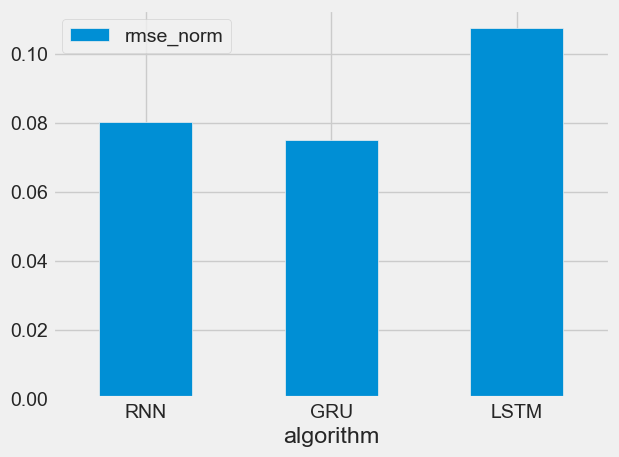

In [243]:
data_tuning_long_MAPI = pd.concat([minimum_config_RNN_MAPI, minimum_config_GRU_MAPI, minimum_config_LSTM_MAPI])
bar_MAPI_tuning_long = data_tuning_long_MAPI.plot.bar(x='algorithm', y=['rmse_norm'], rot=0)
data_tuning_long_MAPI

### KLBF

In [244]:
data_KLBF_long = model_long[model_long["stock"] == "KLBF"]
data_KLBF_long.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
12,KLBF,long,LSTM,97.350467,0.100287,50,50,rmsprop,32
13,KLBF,long,GRU,61.596232,0.067451,50,50,rmsprop,32
14,KLBF,long,RNN,98.210320,0.108520,50,50,rmsprop,32
30,KLBF,long,LSTM,72.659141,0.080286,50,50,adam,32
31,KLBF,long,GRU,51.882926,0.056309,50,50,adam,32


#### LSTM

In [245]:
data_KLBF_LSTM_long = data_KLBF_long[data_KLBF_long["algorithm"] == "LSTM"]
minimum_LSTM_KLBF = data_KLBF_LSTM_long["rmse_norm"].min()
minimum_config_LSTM_KLBF = data_KLBF_LSTM_long[data_KLBF_LSTM_long["rmse_norm"] == minimum_LSTM_KLBF]
minimum_config_LSTM_KLBF

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
30,KLBF,long,LSTM,72.659141,0.080286,50,50,adam,32


#### GRU

In [246]:
data_KLBF_GRU_long = data_KLBF_long[data_KLBF_long["algorithm"] == "GRU"]
minimum_GRU_KLBF = data_KLBF_GRU_long["rmse_norm"].min()
minimum_config_GRU_KLBF = data_KLBF_GRU_long[data_KLBF_GRU_long["rmse_norm"] == minimum_GRU_KLBF]
minimum_config_GRU_KLBF

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
31,KLBF,long,GRU,51.882926,0.056309,50,50,adam,32


#### RNN

In [247]:
data_KLBF_RNN_long = data_KLBF_long[data_KLBF_long["algorithm"] == "RNN"]
minimum_RNN_KLBF = data_KLBF_RNN_long["rmse_norm"].min()
minimum_config_RNN_KLBF = data_KLBF_RNN_long[data_KLBF_RNN_long["rmse_norm"] == minimum_RNN_KLBF]
minimum_config_RNN_KLBF

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
32,KLBF,long,RNN,72.819584,0.079951,50,50,adam,32


#### Best Model

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
32,KLBF,long,RNN,72.819584,0.079951,50,50,adam,32
31,KLBF,long,GRU,51.882926,0.056309,50,50,adam,32
30,KLBF,long,LSTM,72.659141,0.080286,50,50,adam,32


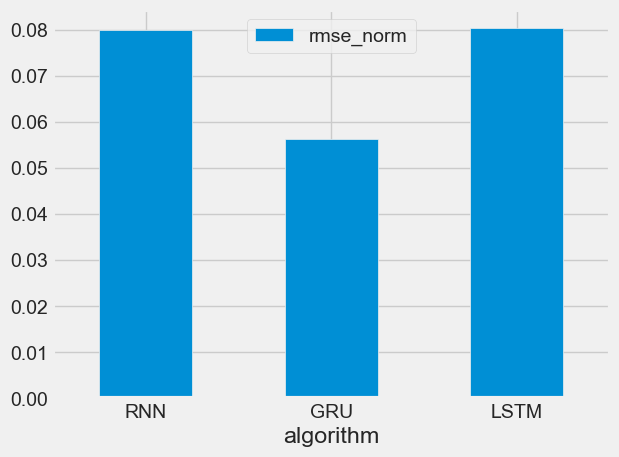

In [248]:
data_tuning_long_KLBF = pd.concat([minimum_config_RNN_KLBF, minimum_config_GRU_KLBF, minimum_config_LSTM_KLBF])
bar_KLBF_tuning_long = data_tuning_long_KLBF.plot.bar(x='algorithm', y=['rmse_norm'], rot=0)
data_tuning_long_KLBF

### TLKM

In [249]:
data_TLKM_long = model_long[model_long["stock"] == "AMRT"]
data_TLKM_long.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
3,AMRT,long,LSTM,85.819877,0.161924,50,50,rmsprop,32
4,AMRT,long,GRU,378.519532,0.424805,50,50,rmsprop,32
5,AMRT,long,RNN,61.072109,0.115230,50,50,rmsprop,32
21,AMRT,long,LSTM,89.416180,0.168710,50,50,adam,32
22,AMRT,long,GRU,85.725099,0.161745,50,50,adam,32


#### LSTM

In [250]:
data_TLKM_LSTM_long = data_TLKM_long[data_TLKM_long["algorithm"] == "LSTM"]
minimum_LSTM_TLKM = data_TLKM_LSTM_long["rmse_norm"].min()
minimum_config_LSTM_TLKM = data_TLKM_LSTM_long[data_TLKM_LSTM_long["rmse_norm"] == minimum_LSTM_TLKM]
minimum_config_LSTM_TLKM

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
129,AMRT,long,LSTM,74.762638,0.141062,50,100,adam,32


#### GRU

In [251]:
data_TLKM_GRU_long = data_TLKM_long[data_TLKM_long["algorithm"] == "GRU"]
minimum_GRU_TLKM = data_TLKM_GRU_long["rmse_norm"].min()
minimum_config_GRU_TLKM = data_TLKM_GRU_long[data_TLKM_GRU_long["rmse_norm"] == minimum_GRU_TLKM]
minimum_config_GRU_TLKM

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
130,AMRT,long,GRU,71.662189,0.135212,50,100,adam,32


#### RNN

In [252]:
data_TLKM_RNN_long = data_TLKM_long[data_TLKM_long["algorithm"] == "RNN"]
minimum_RNN_TLKM = data_TLKM_RNN_long["rmse_norm"].min()
minimum_config_RNN_TLKM = data_TLKM_RNN_long[data_TLKM_RNN_long["rmse_norm"] == minimum_RNN_TLKM]
minimum_config_RNN_TLKM

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
5,AMRT,long,RNN,61.072109,0.11523,50,50,rmsprop,32


#### Best Model

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
5,AMRT,long,RNN,61.072109,0.115230,50,50,rmsprop,32
130,AMRT,long,GRU,71.662189,0.135212,50,100,adam,32
129,AMRT,long,LSTM,74.762638,0.141062,50,100,adam,32


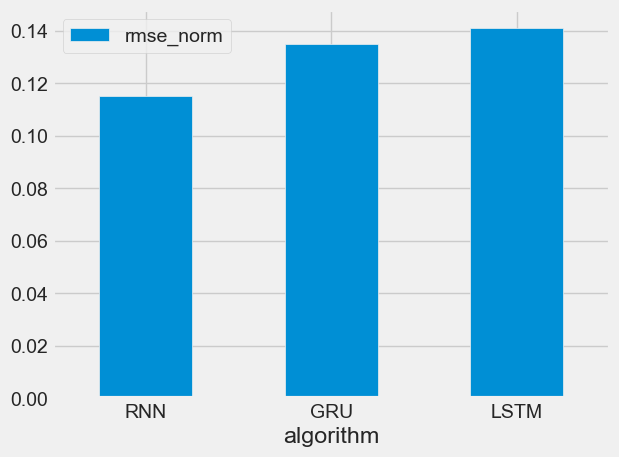

In [253]:
data_tuning_long_TLKM = pd.concat([minimum_config_RNN_TLKM, minimum_config_GRU_TLKM, minimum_config_LSTM_TLKM])
bar_TLKM_tuning_long = data_tuning_long_TLKM.plot.bar(x='algorithm', y=['rmse_norm'], rot=0)
data_tuning_long_TLKM

## Medium Term
Data used is:
- Train : 2023 (1 year)
- Test : January - July 2024 (7 month)


In [254]:
model_medium = pd.read_csv("../result_paper_tuning/result_medium_tuning.csv")
model_medium.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
0,ASII,medium,LSTM,260.137083,0.194859,50,50,rmsprop,32
1,ASII,medium,GRU,174.401087,0.121864,50,50,rmsprop,32
2,ASII,medium,RNN,337.119504,0.180535,50,50,rmsprop,32
3,AMRT,medium,LSTM,72.171872,0.176029,50,50,rmsprop,32
4,AMRT,medium,GRU,67.187506,0.153464,50,50,rmsprop,32


### ASII

In [255]:
data_ASII_medium = model_medium[model_medium["stock"] == "ASII"]
data_ASII_medium.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
0,ASII,medium,LSTM,260.137083,0.194859,50,50,rmsprop,32
1,ASII,medium,GRU,174.401087,0.121864,50,50,rmsprop,32
2,ASII,medium,RNN,337.119504,0.180535,50,50,rmsprop,32
18,ASII,medium,LSTM,296.981091,0.220070,50,50,adam,32
19,ASII,medium,GRU,138.197089,0.101281,50,50,adam,32


#### LSTM

In [256]:
data_ASII_LSTM_medium = data_ASII_medium[data_ASII_medium["algorithm"] == "LSTM"]
minimum_LSTM_ASII = data_ASII_LSTM_medium["rmse_norm"].min()
minimum_config_LSTM_ASII = data_ASII_LSTM_medium[data_ASII_LSTM_medium["rmse_norm"] == minimum_LSTM_ASII]
minimum_config_LSTM_ASII

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
216,ASII,medium,LSTM,170.749659,0.127902,100,50,rmsprop,32


#### GRU

In [257]:
data_ASII_GRU_medium = data_ASII_medium[data_ASII_medium["algorithm"] == "GRU"]
minimum_GRU_ASII = data_ASII_GRU_medium["rmse_norm"].min()
minimum_config_GRU_ASII = data_ASII_GRU_medium[data_ASII_GRU_medium["rmse_norm"] == minimum_GRU_ASII]
minimum_config_GRU_ASII

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
235,ASII,medium,GRU,104.863653,0.077229,100,50,adam,32


#### RNN

In [258]:
data_ASII_RNN_medium = data_ASII_medium[data_ASII_medium["algorithm"] == "RNN"]
minimum_RNN_ASII = data_ASII_RNN_medium["rmse_norm"].min()
minimum_config_RNN_ASII = data_ASII_RNN_medium[data_ASII_RNN_medium["rmse_norm"] == minimum_RNN_ASII]
minimum_config_RNN_ASII

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
218,ASII,medium,RNN,126.0291,0.091287,100,50,rmsprop,32


#### Best Model

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
218,ASII,medium,RNN,126.029100,0.091287,100,50,rmsprop,32
235,ASII,medium,GRU,104.863653,0.077229,100,50,adam,32
216,ASII,medium,LSTM,170.749659,0.127902,100,50,rmsprop,32


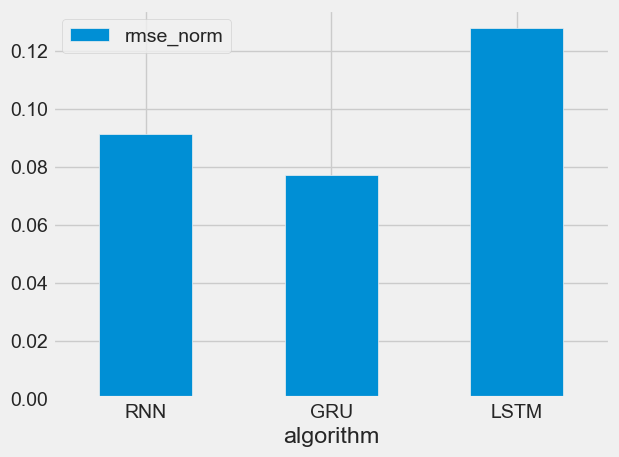

In [259]:
data_tuning_medium_ASII = pd.concat([minimum_config_RNN_ASII, minimum_config_GRU_ASII, minimum_config_LSTM_ASII])
bar_ASII_tuning_medium = data_tuning_medium_ASII.plot.bar(x='algorithm', y=['rmse_norm'], rot=0)
data_tuning_medium_ASII

### AMRT

In [260]:
data_AMRT_medium = model_medium[model_medium["stock"] == "AMRT"]
data_AMRT_medium.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
3,AMRT,medium,LSTM,72.171872,0.176029,50,50,rmsprop,32
4,AMRT,medium,GRU,67.187506,0.153464,50,50,rmsprop,32
5,AMRT,medium,RNN,111.626888,0.236494,50,50,rmsprop,32
21,AMRT,medium,LSTM,82.058773,0.189668,50,50,adam,32
22,AMRT,medium,GRU,67.769365,0.154217,50,50,adam,32


#### LSTM

In [261]:
data_AMRT_LSTM_medium = data_AMRT_medium[data_AMRT_medium["algorithm"] == "LSTM"]
minimum_LSTM_AMRT = data_AMRT_LSTM_medium["rmse_norm"].min()
minimum_config_LSTM_AMRT = data_AMRT_LSTM_medium[data_AMRT_LSTM_medium["rmse_norm"] == minimum_LSTM_AMRT]
minimum_config_LSTM_AMRT

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
111,AMRT,medium,LSTM,60.881792,0.148492,50,100,rmsprop,32


#### GRU

In [262]:
data_AMRT_GRU_medium = data_AMRT_medium[data_AMRT_medium["algorithm"] == "GRU"]
minimum_GRU_AMRT = data_AMRT_GRU_medium["rmse_norm"].min()
minimum_config_GRU_AMRT = data_AMRT_GRU_medium[data_AMRT_GRU_medium["rmse_norm"] == minimum_GRU_AMRT]
minimum_config_GRU_AMRT

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
238,AMRT,medium,GRU,51.964243,0.114878,100,50,adam,32


#### RNN

In [263]:
data_AMRT_RNN_medium = data_AMRT_medium[data_AMRT_medium["algorithm"] == "RNN"]
minimum_RNN_AMRT = data_AMRT_RNN_medium["rmse_norm"].min()
minimum_config_RNN_AMRT = data_AMRT_RNN_medium[data_AMRT_RNN_medium["rmse_norm"] == minimum_RNN_AMRT]
minimum_config_RNN_AMRT

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
185,AMRT,medium,RNN,60.999548,0.148779,50,100,adam,64


#### Best Model

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
185,AMRT,medium,RNN,60.999548,0.148779,50,100,adam,64
238,AMRT,medium,GRU,51.964243,0.114878,100,50,adam,32
111,AMRT,medium,LSTM,60.881792,0.148492,50,100,rmsprop,32


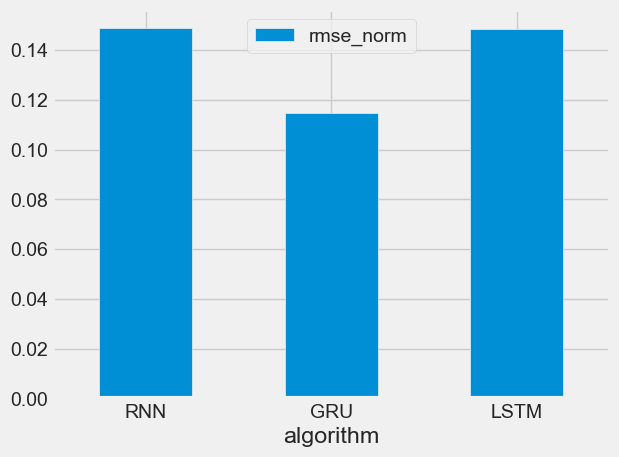

In [264]:
data_tuning_medium_AMRT = pd.concat([minimum_config_RNN_AMRT, minimum_config_GRU_AMRT, minimum_config_LSTM_AMRT])
bar_AMRT_tuning_short = data_tuning_medium_AMRT.plot.bar(x='algorithm', y=['rmse_norm'], rot=0)
data_tuning_medium_AMRT

### ADRO

In [265]:
data_ADRO_medium = model_medium[model_medium["stock"] == "ADRO"]
data_ADRO_medium.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
6,ADRO,medium,LSTM,109.046845,0.123917,50,50,rmsprop,32
7,ADRO,medium,GRU,108.079270,0.120305,50,50,rmsprop,32
8,ADRO,medium,RNN,122.510251,0.139216,50,50,rmsprop,32
24,ADRO,medium,LSTM,94.855627,0.107790,50,50,adam,32
25,ADRO,medium,GRU,61.827341,0.070258,50,50,adam,32


#### LSTM

In [266]:
data_ADRO_LSTM_medium = data_ADRO_medium[data_ADRO_medium["algorithm"] == "LSTM"]
minimum_LSTM_ADRO = data_ADRO_LSTM_medium["rmse_norm"].min()
minimum_config_LSTM_ADRO = data_ADRO_LSTM_medium[data_ADRO_LSTM_medium["rmse_norm"] == minimum_LSTM_ADRO]
minimum_config_LSTM_ADRO

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
240,ADRO,medium,LSTM,78.891491,0.089649,100,50,adam,32


#### GRU

In [267]:
data_ADRO_GRU_medium = data_ADRO_medium[data_ADRO_medium["algorithm"] == "GRU"]
minimum_GRU_ADRO = data_ADRO_GRU_medium["rmse_norm"].min()
minimum_config_GRU_ADRO = data_ADRO_GRU_medium[data_ADRO_GRU_medium["rmse_norm"] == minimum_GRU_ADRO]
minimum_config_GRU_ADRO

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
241,ADRO,medium,GRU,43.047363,0.048917,100,50,adam,32


#### RNN

In [268]:
data_ADRO_RNN_medium = data_ADRO_medium[data_ADRO_medium["algorithm"] == "RNN"]
minimum_RNN_ADRO = data_ADRO_RNN_medium["rmse_norm"].min()
minimum_config_RNN_ADRO = data_ADRO_RNN_medium[data_ADRO_RNN_medium["rmse_norm"] == minimum_RNN_ADRO]
minimum_config_RNN_ADRO

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
242,ADRO,medium,RNN,72.485672,0.08237,100,50,adam,32


#### Best Model

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
242,ADRO,medium,RNN,72.485672,0.082370,100,50,adam,32
241,ADRO,medium,GRU,43.047363,0.048917,100,50,adam,32
240,ADRO,medium,LSTM,78.891491,0.089649,100,50,adam,32


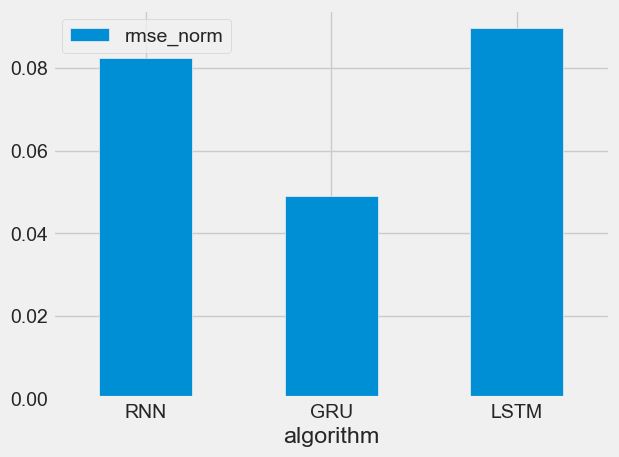

In [269]:
data_tuning_medium_ADRO = pd.concat([minimum_config_RNN_ADRO, minimum_config_GRU_ADRO, minimum_config_LSTM_ADRO])
bar_ADRO_tuning_medium = data_tuning_medium_ADRO.plot.bar(x='algorithm', y=['rmse_norm'], rot=0)
data_tuning_medium_ADRO

### MAPI

In [270]:
data_MAPI_medium = model_medium[model_medium["stock"] == "MAPI"]
data_MAPI_medium.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
9,MAPI,medium,LSTM,120.481261,0.161720,50,50,rmsprop,32
10,MAPI,medium,GRU,77.672137,0.104258,50,50,rmsprop,32
11,MAPI,medium,RNN,73.108124,0.097060,50,50,rmsprop,32
27,MAPI,medium,LSTM,95.894473,0.128717,50,50,adam,32
28,MAPI,medium,GRU,59.086599,0.079311,50,50,adam,32


#### LSTM

In [271]:
data_MAPI_LSTM_medium = data_MAPI_medium[data_MAPI_medium["algorithm"] == "LSTM"]
minimum_LSTM_MAPI = data_MAPI_LSTM_medium["rmse_norm"].min()
minimum_config_LSTM_MAPI = data_MAPI_LSTM_medium[data_MAPI_LSTM_medium["rmse_norm"] == minimum_LSTM_MAPI]
minimum_config_LSTM_MAPI

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
135,MAPI,medium,LSTM,84.325216,0.113188,50,100,adam,32


#### GRU

In [272]:
data_MAPI_GRU_medium = data_MAPI_medium[data_MAPI_medium["algorithm"] == "GRU"]
minimum_GRU_MAPI = data_MAPI_GRU_medium["rmse_norm"].min()
minimum_config_GRU_MAPI = data_MAPI_GRU_medium[data_MAPI_GRU_medium["rmse_norm"] == minimum_GRU_MAPI]
minimum_config_GRU_MAPI

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
244,MAPI,medium,GRU,47.289038,0.063475,100,50,adam,32


#### RNN

In [273]:
data_MAPI_RNN_medium = data_MAPI_medium[data_MAPI_medium["algorithm"] == "RNN"]
minimum_RNN_MAPI = data_MAPI_RNN_medium["rmse_norm"].min()
minimum_config_RNN_MAPI = data_MAPI_RNN_medium[data_MAPI_RNN_medium["rmse_norm"] == minimum_RNN_MAPI]
minimum_config_RNN_MAPI

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
245,MAPI,medium,RNN,55.750973,0.074834,100,50,adam,32


#### Best Model

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
245,MAPI,medium,RNN,55.750973,0.074834,100,50,adam,32
244,MAPI,medium,GRU,47.289038,0.063475,100,50,adam,32
135,MAPI,medium,LSTM,84.325216,0.113188,50,100,adam,32


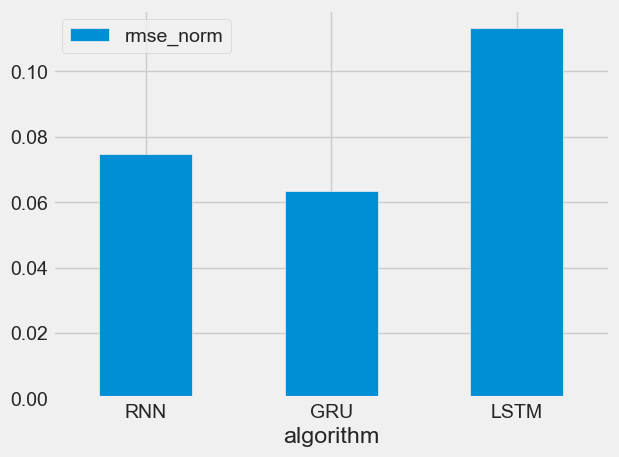

In [274]:
data_tuning_medium_MAPI = pd.concat([minimum_config_RNN_MAPI, minimum_config_GRU_MAPI, minimum_config_LSTM_MAPI])
bar_MAPI_tuning_medium = data_tuning_medium_MAPI.plot.bar(x='algorithm', y=['rmse_norm'], rot=0)
data_tuning_medium_MAPI

### KLBF

In [275]:
data_KLBF_medium = model_medium[model_medium["stock"] == "KLBF"]
data_KLBF_medium.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
12,KLBF,medium,LSTM,45.963305,0.193439,50,50,rmsprop,32
13,KLBF,medium,GRU,35.335051,0.151260,50,50,rmsprop,32
14,KLBF,medium,RNN,96.876890,0.239439,50,50,rmsprop,32
30,KLBF,medium,LSTM,44.925541,0.197604,50,50,adam,32
31,KLBF,medium,GRU,37.271195,0.158026,50,50,adam,32


#### LSTM

In [276]:
data_KLBF_LSTM_medium = data_KLBF_medium[data_KLBF_medium["algorithm"] == "LSTM"]
minimum_LSTM_KLBF = data_KLBF_LSTM_medium["rmse_norm"].min()
minimum_config_LSTM_KLBF = data_KLBF_LSTM_medium[data_KLBF_LSTM_medium["rmse_norm"] == minimum_LSTM_KLBF]
minimum_config_LSTM_KLBF

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
228,KLBF,medium,LSTM,38.657586,0.171811,100,50,rmsprop,32


#### GRU

In [277]:
data_KLBF_GRU_medium = data_KLBF_medium[data_KLBF_medium["algorithm"] == "GRU"]
minimum_GRU_KLBF = data_KLBF_GRU_medium["rmse_norm"].min()
minimum_config_GRU_KLBF = data_KLBF_GRU_medium[data_KLBF_GRU_medium["rmse_norm"] == minimum_GRU_KLBF]
minimum_config_GRU_KLBF

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
121,KLBF,medium,GRU,31.111165,0.138272,50,100,rmsprop,32


#### RNN

In [278]:
data_KLBF_RNN_medium = data_KLBF_medium[data_KLBF_medium["algorithm"] == "RNN"]
minimum_RNN_KLBF = data_KLBF_RNN_medium["rmse_norm"].min()
minimum_config_RNN_KLBF = data_KLBF_RNN_medium[data_KLBF_RNN_medium["rmse_norm"] == minimum_RNN_KLBF]
minimum_config_RNN_KLBF

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
284,KLBF,medium,RNN,26.958453,0.119815,100,50,rmsprop,64


#### Best Model

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
284,KLBF,medium,RNN,26.958453,0.119815,100,50,rmsprop,64
121,KLBF,medium,GRU,31.111165,0.138272,50,100,rmsprop,32
228,KLBF,medium,LSTM,38.657586,0.171811,100,50,rmsprop,32


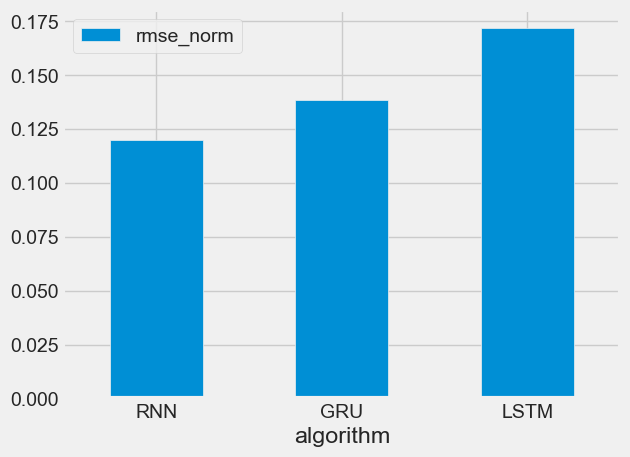

In [279]:
data_tuning_medium_KLBF = pd.concat([minimum_config_RNN_KLBF, minimum_config_GRU_KLBF, minimum_config_LSTM_KLBF])
bar_KLBF_tuning_medium = data_tuning_medium_KLBF.plot.bar(x='algorithm', y=['rmse_norm'], rot=0)
data_tuning_medium_KLBF

### TLKM

In [280]:
data_TLKM_medium = model_medium[model_medium["stock"] == "TLKM"]
data_TLKM_medium.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
15,TLKM,medium,LSTM,191.552219,0.130775,50,50,rmsprop,32
16,TLKM,medium,GRU,136.033439,0.093174,50,50,rmsprop,32
17,TLKM,medium,RNN,167.988073,0.110951,50,50,rmsprop,32
33,TLKM,medium,LSTM,187.640462,0.128521,50,50,adam,32
34,TLKM,medium,GRU,115.990777,0.079420,50,50,adam,32


#### LSTM

In [281]:
data_TLKM_LSTM_medium = data_TLKM_medium[data_TLKM_medium["algorithm"] == "LSTM"]
minimum_LSTM_TLKM = data_TLKM_LSTM_medium["rmse_norm"].min()
minimum_config_LSTM_TLKM = data_TLKM_LSTM_medium[data_TLKM_LSTM_medium["rmse_norm"] == minimum_LSTM_TLKM]
minimum_config_LSTM_TLKM

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
231,TLKM,medium,LSTM,144.683357,0.099098,100,50,rmsprop,32


#### GRU

In [282]:
data_TLKM_GRU_medium = data_TLKM_medium[data_TLKM_medium["algorithm"] == "GRU"]
minimum_GRU_TLKM = data_TLKM_GRU_medium["rmse_norm"].min()
minimum_config_GRU_TLKM = data_TLKM_GRU_medium[data_TLKM_GRU_medium["rmse_norm"] == minimum_GRU_TLKM]
minimum_config_GRU_TLKM

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
250,TLKM,medium,GRU,92.271924,0.061742,100,50,adam,32


#### RNN

In [283]:
data_TLKM_RNN_medium = data_TLKM_medium[data_TLKM_medium["algorithm"] == "RNN"]
minimum_RNN_TLKM = data_TLKM_RNN_medium["rmse_norm"].min()
minimum_config_RNN_TLKM = data_TLKM_RNN_medium[data_TLKM_RNN_medium["rmse_norm"] == minimum_RNN_TLKM]
minimum_config_RNN_TLKM

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
233,TLKM,medium,RNN,79.523307,0.054468,100,50,rmsprop,32


,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
233,TLKM,medium,RNN,79.523307,0.054468,100,50,rmsprop,32
250,TLKM,medium,GRU,92.271924,0.061742,100,50,adam,32
231,TLKM,medium,LSTM,144.683357,0.099098,100,50,rmsprop,32


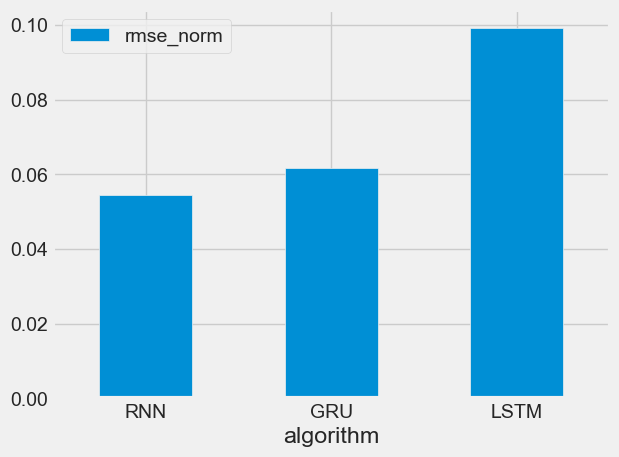

In [284]:
data_tuning_medium_TLKM = pd.concat([minimum_config_RNN_TLKM, minimum_config_GRU_TLKM, minimum_config_LSTM_TLKM])
bar_TLKM_tuning_medium = data_tuning_medium_TLKM.plot.bar(x='algorithm', y=['rmse_norm'], rot=0)
data_tuning_medium_TLKM

#### Best Model

## Short Term
Data used is:
- Train : January - September 2023 (9 month)
- Test : Oktober - Desember 2023 (3 month)

In [285]:
model_short = pd.read_csv("../result_paper_tuning/result_short_tuning.csv")
model_short.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
0,ASII,short,LSTM,163.222732,0.192027,50,50,rmsprop,32
1,ASII,short,GRU,105.502766,0.124121,50,50,rmsprop,32
2,ASII,short,RNN,198.967726,0.194868,50,50,rmsprop,32
3,AMRT,short,LSTM,75.524925,0.187020,50,50,rmsprop,32
4,AMRT,short,GRU,55.210275,0.138026,50,50,rmsprop,32


### ASII

In [286]:
data_ASII_short = model_short[model_short["stock"] == "ASII"]
data_ASII_short.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
0,ASII,short,LSTM,163.222732,0.192027,50,50,rmsprop,32
1,ASII,short,GRU,105.502766,0.124121,50,50,rmsprop,32
2,ASII,short,RNN,198.967726,0.194868,50,50,rmsprop,32
18,ASII,short,LSTM,183.632836,0.214606,50,50,adam,32
19,ASII,short,GRU,143.272639,0.168556,50,50,adam,32


#### LSTM

In [287]:
data_ASII_LSTM_short = data_ASII_short[data_ASII_short["algorithm"] == "LSTM"]
minimum_LSTM_ASII = data_ASII_LSTM_short["rmse_norm"].min()
minimum_config_LSTM_ASII = data_ASII_LSTM_short[data_ASII_LSTM_short["rmse_norm"] == minimum_LSTM_ASII]
minimum_config_LSTM_ASII

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
324,ASII,short,LSTM,135.467119,0.159373,100,100,rmsprop,32


#### GRU

In [288]:
data_ASII_GRU_short = data_ASII_short[data_ASII_short["algorithm"] == "GRU"]
minimum_GRU_ASII = data_ASII_GRU_short["rmse_norm"].min()
minimum_config_GRU_ASII = data_ASII_GRU_short[data_ASII_GRU_short["rmse_norm"] == minimum_GRU_ASII]
minimum_config_GRU_ASII

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
343,ASII,short,GRU,79.44775,0.093468,100,100,adam,32


#### RNN

In [289]:
data_ASII_RNN_short = data_ASII_short[data_ASII_short["algorithm"] == "RNN"]
minimum_RNN_ASII = data_ASII_RNN_short["rmse_norm"].min()
minimum_config_RNN_ASII = data_ASII_RNN_short[data_ASII_RNN_short["rmse_norm"] == minimum_RNN_ASII]
minimum_config_RNN_ASII

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
272,ASII,short,RNN,74.386256,0.087513,100,50,rmsprop,64


#### Best Model

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
272,ASII,short,RNN,74.386256,0.087513,100,50,rmsprop,64
343,ASII,short,GRU,79.447750,0.093468,100,100,adam,32
324,ASII,short,LSTM,135.467119,0.159373,100,100,rmsprop,32


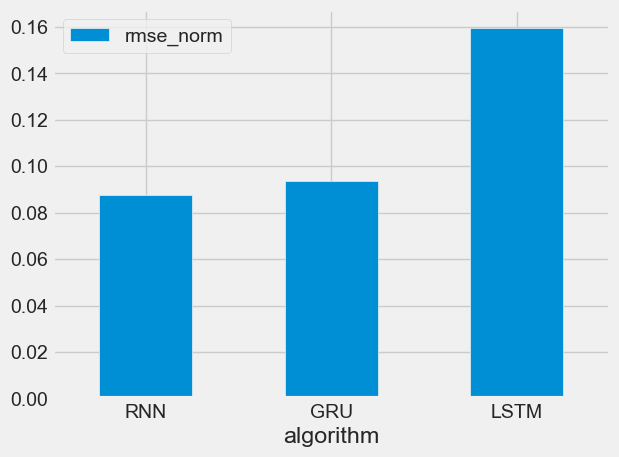

In [290]:
data_tuning_short_ASII = pd.concat([minimum_config_RNN_ASII, minimum_config_GRU_ASII, minimum_config_LSTM_ASII])
bar_ASII_tuning_short = data_tuning_short_ASII.plot.bar(x='algorithm', y=['rmse_norm'], rot=0)
data_tuning_short_ASII

### AMRT

In [291]:
data_AMRT_short = model_short[model_short["stock"] == "AMRT"]
data_AMRT_short.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
3,AMRT,short,LSTM,75.524925,0.187020,50,50,rmsprop,32
4,AMRT,short,GRU,55.210275,0.138026,50,50,rmsprop,32
5,AMRT,short,RNN,77.281137,0.183477,50,50,rmsprop,32
21,AMRT,short,LSTM,61.243017,0.153108,50,50,adam,32
22,AMRT,short,GRU,70.009394,0.170426,50,50,adam,32


#### LSTM

In [292]:
data_AMRT_LSTM_short = data_AMRT_short[data_AMRT_short["algorithm"] == "LSTM"]
minimum_LSTM_AMRT = data_AMRT_LSTM_short["rmse_norm"].min()
minimum_config_LSTM_AMRT = data_AMRT_LSTM_short[data_AMRT_LSTM_short["rmse_norm"] == minimum_LSTM_AMRT]
minimum_config_LSTM_AMRT

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
111,AMRT,short,LSTM,58.411374,0.146028,50,100,rmsprop,32


#### GRU

In [293]:
data_AMRT_GRU_short = data_AMRT_short[data_AMRT_short["algorithm"] == "GRU"]
minimum_GRU_AMRT = data_AMRT_GRU_short["rmse_norm"].min()
minimum_config_GRU_AMRT = data_AMRT_GRU_short[data_AMRT_GRU_short["rmse_norm"] == minimum_GRU_AMRT]
minimum_config_GRU_AMRT

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
4,AMRT,short,GRU,55.210275,0.138026,50,50,rmsprop,32


#### RNN

In [294]:
data_AMRT_RNN_short = data_AMRT_short[data_AMRT_short["algorithm"] == "RNN"]
minimum_RNN_AMRT = data_AMRT_RNN_short["rmse_norm"].min()
minimum_config_RNN_AMRT = data_AMRT_RNN_short[data_AMRT_RNN_short["rmse_norm"] == minimum_RNN_AMRT]
minimum_config_RNN_AMRT

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
293,AMRT,short,RNN,53.530476,0.133826,100,50,adam,64


#### Best Model

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
293,AMRT,short,RNN,53.530476,0.133826,100,50,adam,64
4,AMRT,short,GRU,55.210275,0.138026,50,50,rmsprop,32
111,AMRT,short,LSTM,58.411374,0.146028,50,100,rmsprop,32


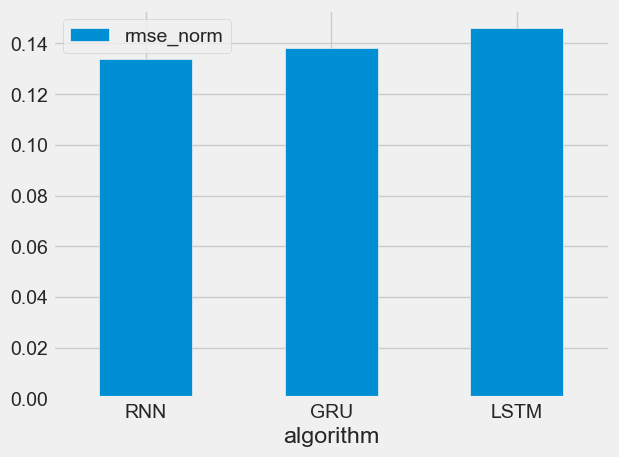

In [295]:
data_tuning_short_AMRT = pd.concat([minimum_config_RNN_AMRT, minimum_config_GRU_AMRT, minimum_config_LSTM_AMRT])
bar_AMRT_tuning_short = data_tuning_short_AMRT.plot.bar(x='algorithm', y=['rmse_norm'], rot=0)
data_tuning_short_AMRT

### ADRO

In [296]:
data_ADRO_short = model_short[model_short["stock"] == "ADRO"]
data_ADRO_short.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
6,ADRO,short,LSTM,86.596708,0.185508,50,50,rmsprop,32
7,ADRO,short,GRU,76.219152,0.177254,50,50,rmsprop,32
8,ADRO,short,RNN,129.599165,0.226767,50,50,rmsprop,32
24,ADRO,short,LSTM,100.849149,0.197366,50,50,adam,32
25,ADRO,short,GRU,72.202377,0.167913,50,50,adam,32


#### LSTM

In [297]:
data_ADRO_LSTM_short = data_ADRO_short[data_ADRO_short["algorithm"] == "LSTM"]
minimum_LSTM_ADRO = data_ADRO_LSTM_short["rmse_norm"].min()
minimum_config_LSTM_ADRO = data_ADRO_LSTM_short[data_ADRO_LSTM_short["rmse_norm"] == minimum_LSTM_ADRO]
minimum_config_LSTM_ADRO

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
168,ADRO,short,LSTM,86.966917,0.184844,50,100,rmsprop,64


#### GRU

In [298]:
data_ADRO_GRU_short = data_ADRO_short[data_ADRO_short["algorithm"] == "GRU"]
minimum_GRU_ADRO = data_ADRO_GRU_short["rmse_norm"].min()
minimum_config_GRU_ADRO = data_ADRO_GRU_short[data_ADRO_GRU_short["rmse_norm"] == minimum_GRU_ADRO]
minimum_config_GRU_ADRO

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
349,ADRO,short,GRU,70.926662,0.147607,100,100,adam,32


#### RNN

In [299]:
data_ADRO_RNN_short = data_ADRO_short[data_ADRO_short["algorithm"] == "RNN"]
minimum_RNN_ADRO = data_ADRO_RNN_short["rmse_norm"].min()
minimum_config_RNN_ADRO = data_ADRO_RNN_short[data_ADRO_RNN_short["rmse_norm"] == minimum_RNN_ADRO]
minimum_config_RNN_ADRO

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
224,ADRO,short,RNN,52.127727,0.121227,100,50,rmsprop,32


#### Best Model

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
224,ADRO,short,RNN,52.127727,0.121227,100,50,rmsprop,32
349,ADRO,short,GRU,70.926662,0.147607,100,100,adam,32
168,ADRO,short,LSTM,86.966917,0.184844,50,100,rmsprop,64


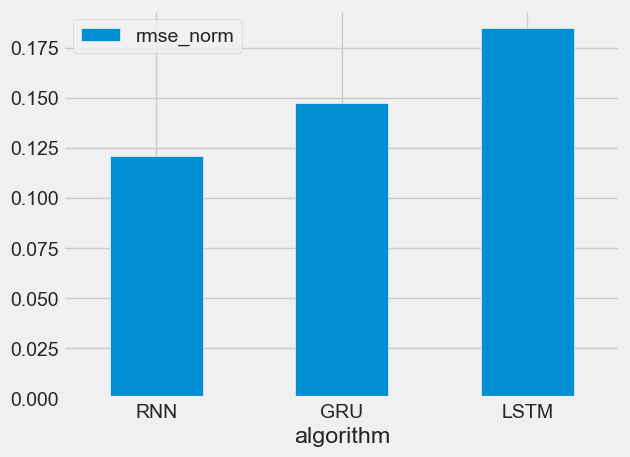

In [300]:
data_tuning_short_ADRO = pd.concat([minimum_config_RNN_ADRO, minimum_config_GRU_ADRO, minimum_config_LSTM_ADRO])
bar_ADRO_tuning_short = data_tuning_short_ADRO.plot.bar(x='algorithm', y=['rmse_norm'], rot=0)
data_tuning_short_ADRO

### MAPI

In [301]:
data_MAPI_short = model_short[model_short["stock"] == "MAPI"]
data_MAPI_short.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
9,MAPI,short,LSTM,80.179588,0.190904,50,50,rmsprop,32
10,MAPI,short,GRU,122.991961,0.254263,50,50,rmsprop,32
11,MAPI,short,RNN,190.287320,0.336844,50,50,rmsprop,32
27,MAPI,short,LSTM,85.593025,0.203793,50,50,adam,32
28,MAPI,short,GRU,82.254511,0.195459,50,50,adam,32


#### LSTM

In [302]:
data_MAPI_LSTM_short = data_MAPI_short[data_MAPI_short["algorithm"] == "LSTM"]
minimum_LSTM_MAPI = data_MAPI_LSTM_short["rmse_norm"].min()
minimum_config_LSTM_MAPI = data_MAPI_LSTM_short[data_MAPI_LSTM_short["rmse_norm"] == minimum_LSTM_MAPI]
minimum_config_LSTM_MAPI

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
333,MAPI,short,LSTM,75.204565,0.179058,100,100,rmsprop,32


#### GRU

In [303]:
data_MAPI_GRU_short = data_MAPI_short[data_MAPI_short["algorithm"] == "GRU"]
minimum_GRU_MAPI = data_MAPI_GRU_short["rmse_norm"].min()
minimum_config_GRU_MAPI = data_MAPI_GRU_short[data_MAPI_GRU_short["rmse_norm"] == minimum_GRU_MAPI]
minimum_config_GRU_MAPI

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
352,MAPI,short,GRU,53.866994,0.128255,100,100,adam,32


#### RNN

In [304]:
data_MAPI_RNN_short = data_MAPI_short[data_MAPI_short["algorithm"] == "RNN"]
minimum_RNN_MAPI = data_MAPI_RNN_short["rmse_norm"].min()
minimum_config_RNN_MAPI = data_MAPI_RNN_short[data_MAPI_RNN_short["rmse_norm"] == minimum_RNN_MAPI]
minimum_config_RNN_MAPI

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
245,MAPI,short,RNN,66.600951,0.158574,100,50,adam,32


#### Best Model

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
245,MAPI,short,RNN,66.600951,0.158574,100,50,adam,32
352,MAPI,short,GRU,53.866994,0.128255,100,100,adam,32
333,MAPI,short,LSTM,75.204565,0.179058,100,100,rmsprop,32


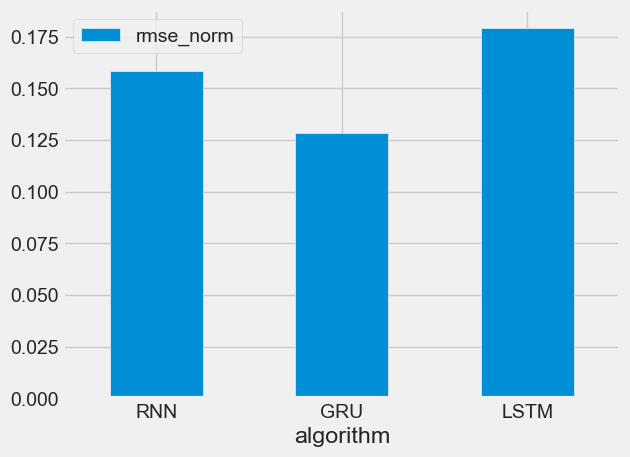

In [305]:
data_tuning_short_MAPI = pd.concat([minimum_config_RNN_MAPI, minimum_config_GRU_MAPI, minimum_config_LSTM_MAPI])
bar_MAPI_tuning_short = data_tuning_short_MAPI.plot.bar(x='algorithm', y=['rmse_norm'], rot=0)
data_tuning_short_MAPI

### KLBF

In [306]:
data_KLBF_short = model_short[model_short["stock"] == "KLBF"]
data_KLBF_short.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
12,KLBF,short,LSTM,57.808688,0.202838,50,50,rmsprop,32
13,KLBF,short,GRU,58.695687,0.205950,50,50,rmsprop,32
14,KLBF,short,RNN,45.857855,0.160905,50,50,rmsprop,32
30,KLBF,short,LSTM,58.659220,0.205822,50,50,adam,32
31,KLBF,short,GRU,51.675253,0.181317,50,50,adam,32


#### LSTM

In [307]:
data_KLBF_LSTM_short = data_KLBF_short[data_KLBF_short["algorithm"] == "LSTM"]
minimum_LSTM_KLBF = data_KLBF_LSTM_short["rmse_norm"].min()
minimum_config_LSTM_KLBF = data_KLBF_LSTM_short[data_KLBF_LSTM_short["rmse_norm"] == minimum_LSTM_KLBF]
minimum_config_LSTM_KLBF

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
336,KLBF,short,LSTM,48.880918,0.171512,100,100,rmsprop,32


#### GRU

In [308]:
data_KLBF_GRU_short = data_KLBF_short[data_KLBF_short["algorithm"] == "GRU"]
minimum_GRU_KLBF = data_KLBF_GRU_short["rmse_norm"].min()
minimum_config_GRU_KLBF = data_KLBF_GRU_short[data_KLBF_GRU_short["rmse_norm"] == minimum_GRU_KLBF]
minimum_config_GRU_KLBF

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
355,KLBF,short,GRU,38.398818,0.134733,100,100,adam,32


#### RNN


In [309]:
data_KLBF_RNN_short = data_KLBF_short[data_KLBF_short["algorithm"] == "RNN"]
minimum_RNN_KLBF = data_KLBF_RNN_short["rmse_norm"].min()
minimum_config_RNN_KLBF = data_KLBF_RNN_short[data_KLBF_RNN_short["rmse_norm"] == minimum_RNN_KLBF]
minimum_config_RNN_KLBF

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
338,KLBF,short,RNN,35.548137,0.12473,100,100,rmsprop,32


#### Best Model

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
338,KLBF,short,RNN,35.548137,0.124730,100,100,rmsprop,32
355,KLBF,short,GRU,38.398818,0.134733,100,100,adam,32
336,KLBF,short,LSTM,48.880918,0.171512,100,100,rmsprop,32


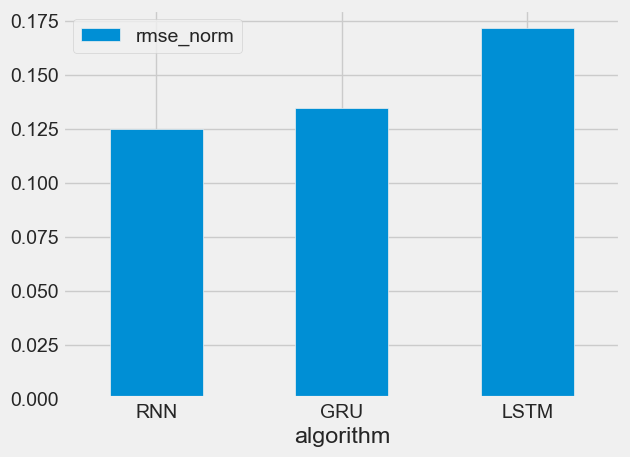

In [310]:
data_tuning_short_KLBF = pd.concat([minimum_config_RNN_KLBF, minimum_config_GRU_KLBF, minimum_config_LSTM_KLBF])
bar_KLBF_tuning_short = data_tuning_short_KLBF.plot.bar(x='algorithm', y=['rmse_norm'], rot=0)
data_tuning_short_KLBF

### TLKM

In [311]:
data_TLKM_short = model_short[model_short["stock"] == "TLKM"]
data_TLKM_short.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
15,TLKM,short,LSTM,85.797963,0.150523,50,50,rmsprop,32
16,TLKM,short,GRU,71.596323,0.125608,50,50,rmsprop,32
17,TLKM,short,RNN,58.406603,0.102468,50,50,rmsprop,32
33,TLKM,short,LSTM,89.940284,0.157147,50,50,adam,32
34,TLKM,short,GRU,64.230574,0.111828,50,50,adam,32


#### LSTM

In [312]:
data_TLKM_LSTM_short = data_TLKM_short[data_TLKM_short["algorithm"] == "LSTM"]
minimum_LSTM_TLKM = data_TLKM_LSTM_short["rmse_norm"].min()
minimum_config_LSTM_TLKM = data_TLKM_LSTM_short[data_TLKM_LSTM_short["rmse_norm"] == minimum_LSTM_TLKM]
minimum_config_LSTM_TLKM

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
357,TLKM,short,LSTM,68.829442,0.113807,100,100,adam,32


#### GRU

In [313]:
data_TLKM_GRU_short = data_TLKM_short[data_TLKM_short["algorithm"] == "GRU"]
minimum_GRU_TLKM = data_TLKM_GRU_short["rmse_norm"].min()
minimum_config_GRU_TLKM = data_TLKM_GRU_short[data_TLKM_GRU_short["rmse_norm"] == minimum_GRU_TLKM]
minimum_config_GRU_TLKM

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
358,TLKM,short,GRU,49.743359,0.086248,100,100,adam,32


#### RNN

In [314]:
data_TLKM_RNN_short = data_TLKM_short[data_TLKM_short["algorithm"] == "RNN"]
minimum_RNN_TLKM = data_TLKM_RNN_short["rmse_norm"].min()
minimum_config_RNN_TLKM = data_TLKM_RNN_short[data_TLKM_RNN_short["rmse_norm"] == minimum_RNN_TLKM]
minimum_config_RNN_TLKM

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
395,TLKM,short,RNN,51.141998,0.087921,100,100,rmsprop,64


#### Best Model

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
395,TLKM,short,RNN,51.141998,0.087921,100,100,rmsprop,64
358,TLKM,short,GRU,49.743359,0.086248,100,100,adam,32
357,TLKM,short,LSTM,68.829442,0.113807,100,100,adam,32


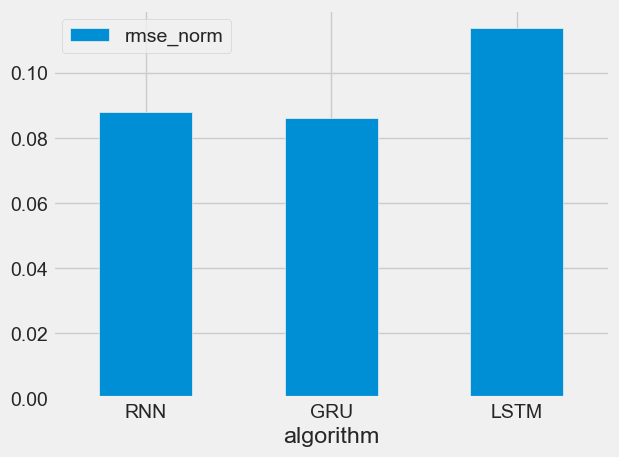

In [315]:
data_tuning_short_TLKM = pd.concat([minimum_config_RNN_TLKM, minimum_config_GRU_TLKM, minimum_config_LSTM_TLKM])
bar_TLKM_tuning_short = data_tuning_short_TLKM.plot.bar(x='algorithm', y=['rmse_norm'], rot=0)
data_tuning_short_TLKM